# Perform Exploratory Data Analysis on 'Indian Premiere League'
● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

● Dataset:https://bit.ly/34SRn3b

In [1]:
#Importing libraries
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading datasets
matches  = pd.read_csv('matches.csv',index_col=0)

matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
#shape of the data
matches.shape

(756, 17)

In [4]:
# duplicates
matches[matches.duplicated()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,


In [5]:
# missing data
matches_missing = pd.DataFrame({'Count':matches.isna().sum(),'Percentage':(matches.isna().sum()/len(matches))*100})
matches_missing.sort_values(by='Count',ascending=False)

,Count,Percentage
umpire3,637,84.259259
city,7,0.925926
winner,4,0.529101
player_of_match,4,0.529101
umpire2,2,0.264550
umpire1,2,0.264550
venue,0,0.000000
win_by_wickets,0,0.000000
win_by_runs,0,0.000000
season,0,0.000000


In [6]:
matches = matches.drop('umpire3',1)

In [7]:
print('The data before dropping null values: ',matches.shape)
matches = matches.dropna(axis=0)
print('The data after dropping null values: ',matches.shape)

The data before dropping null values:  (756, 16)
The data after dropping null values:  (743, 16)


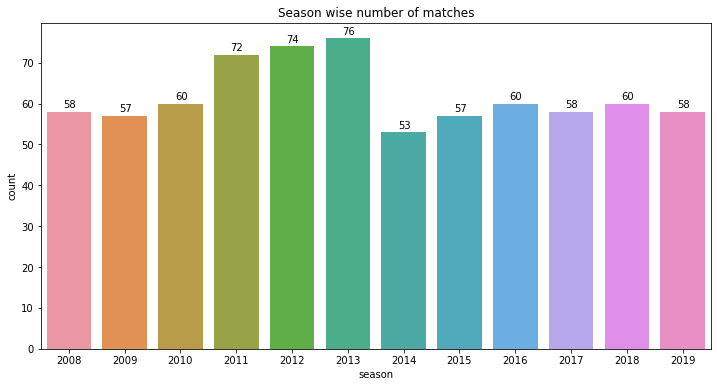

In [8]:
#Season wise number of matches
plt.figure(figsize=(12,6))
ax = sns.countplot(matches['season'])
plt.title('Season wise number of matches')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

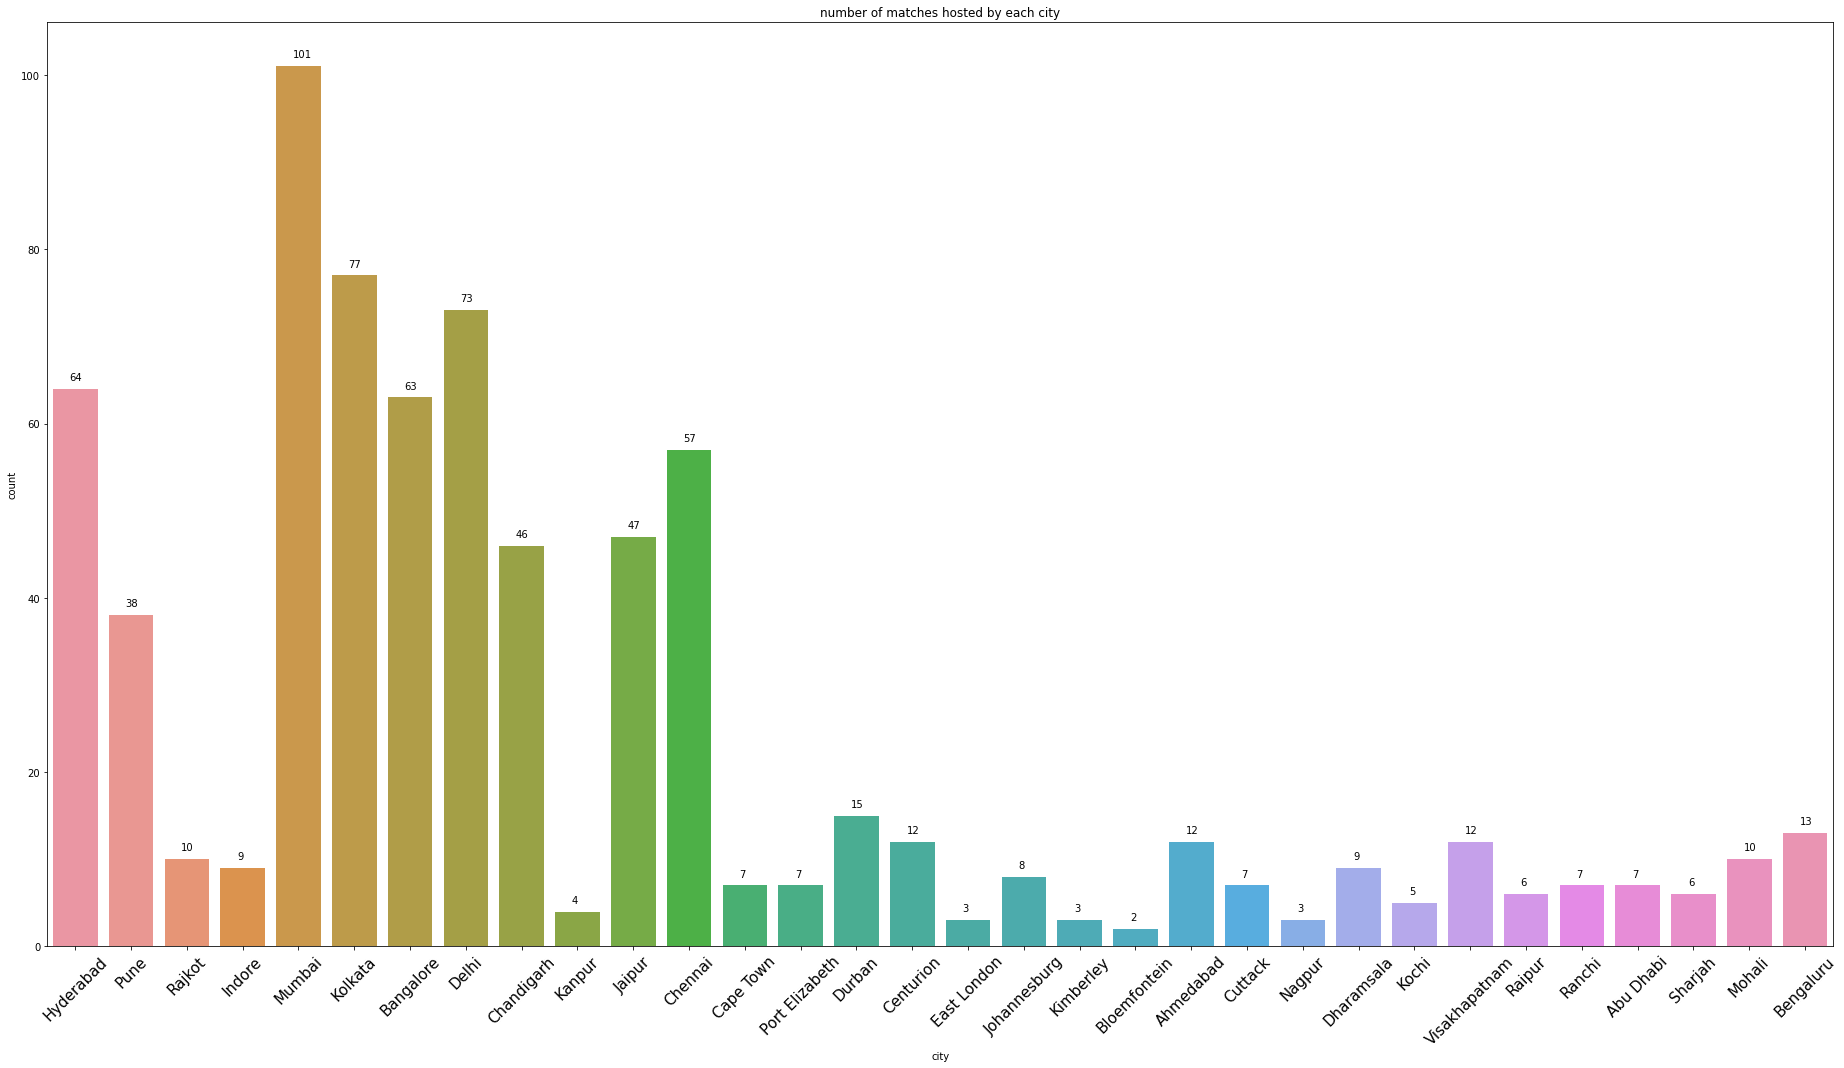

In [9]:
# city hosted more number of matches
plt.figure(figsize=(32,17))
ax = sns.countplot(matches['city'])
plt.title('number of matches hosted by each city')
plt.xticks(rotation=45,fontsize=15)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

In [ ]:
City Mumbai hosted more number of matches followed by Kolkata

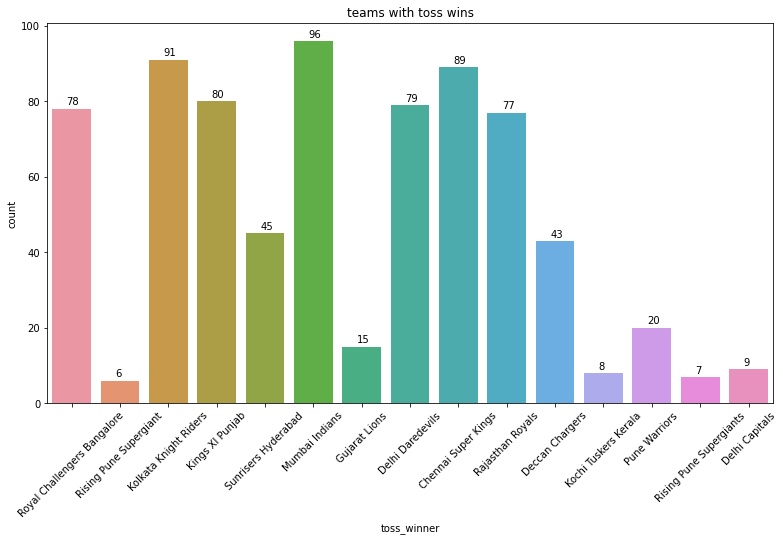

In [11]:
# teams with toss wins
plt.figure(figsize=(13,7))
ax = sns.countplot(matches['toss_winner'])
plt.title('teams with toss wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

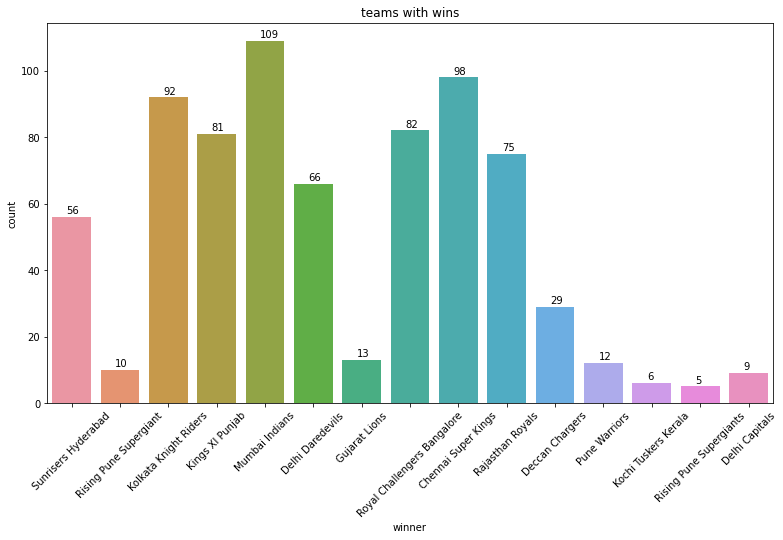

In [12]:
# teams with wins
plt.figure(figsize=(13,7))
ax = sns.countplot(matches['winner'])
plt.title('teams with wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

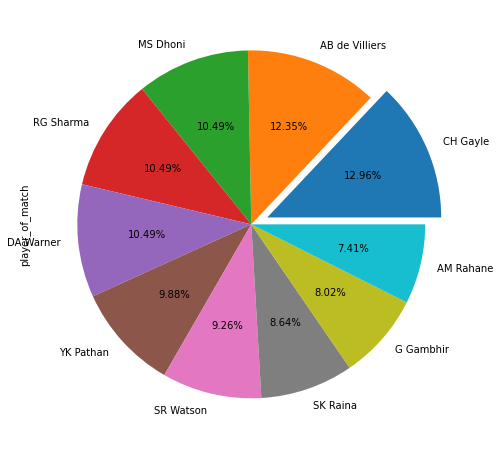

In [13]:
# teams with wins
plt.figure(figsize=(13,8))
explode = [0.1,0,0,0,0,0,0,0,0,0]
matches['player_of_match'].value_counts().head(10).plot(kind='pie',autopct='%0.2f%%',explode=explode)
plt.show()

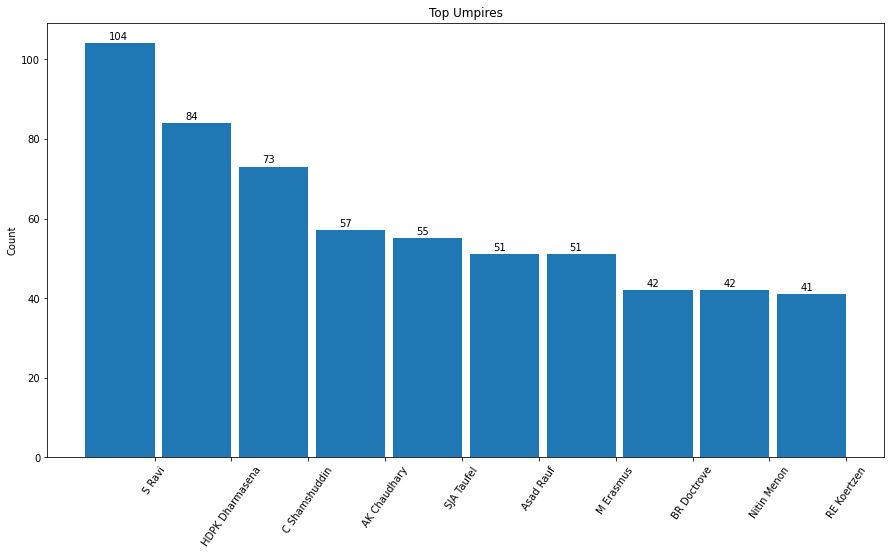

In [14]:
temp_matches = pd.melt(matches,value_vars=['umpire1', 'umpire2'])

temp_series = temp_matches.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width,)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=55)
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

In [15]:
champ = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
champ.sort_values(by='season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


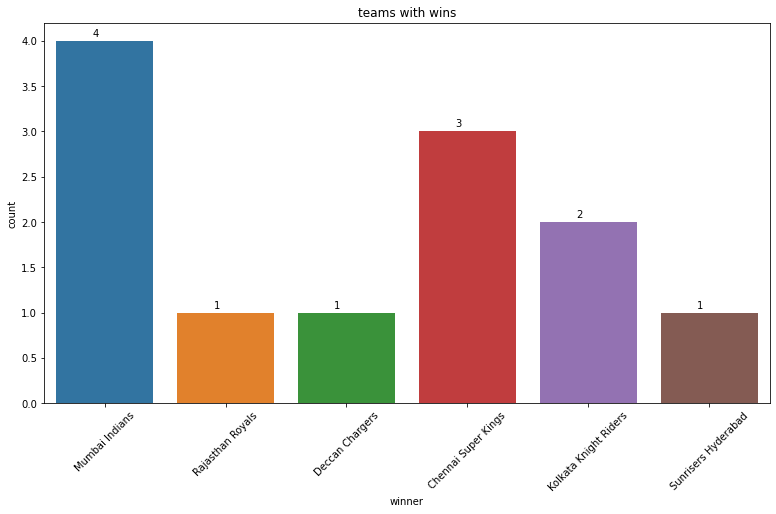

In [16]:
# teams with wins
plt.figure(figsize=(13,7))
ax = sns.countplot(champ['winner'])
plt.title('teams with wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+0.05),color='black')
plt.show()

# Should i bat or field?

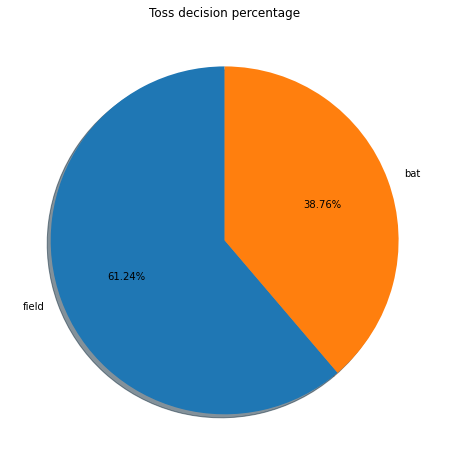

In [17]:
plt.figure(figsize=(10,8))
toss = matches.toss_decision.value_counts()
labels = (np.array(toss.index))
sizes = (np.array((toss / toss.sum())*100))
plt.pie(sizes, labels=labels,
        autopct='%0.2f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

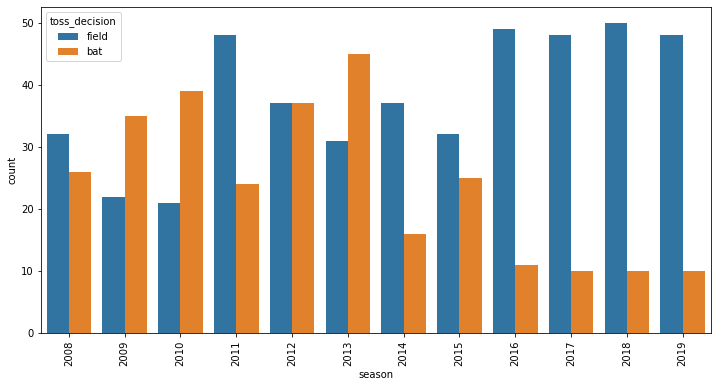

In [18]:
#### seasonal toss analysis
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# BATSMEN ANALYSIS

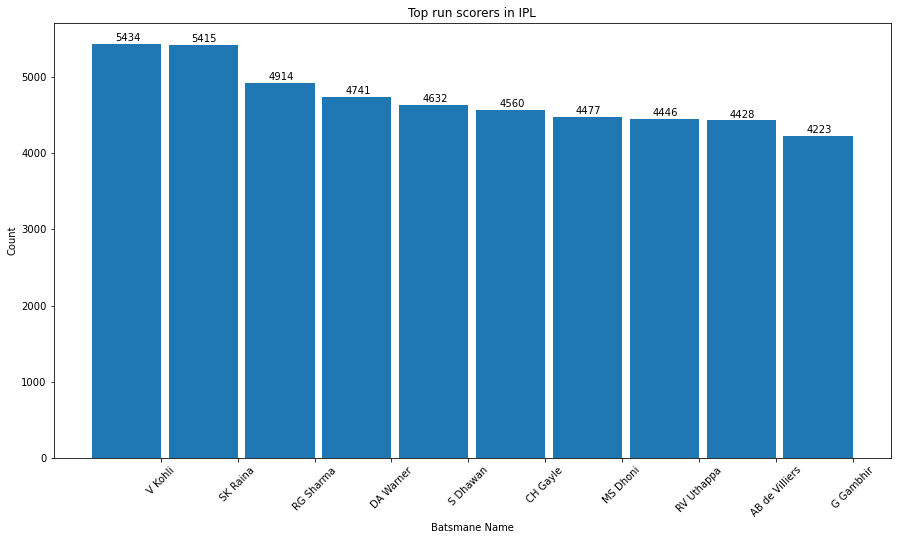

In [20]:
temp_df = df1.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation=45)
ax.set_ylabel("Count")
ax.set_title("Top run scorers in IPL")
ax.set_xlabel('Batsmane Name')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+40),color='black')
plt.show()

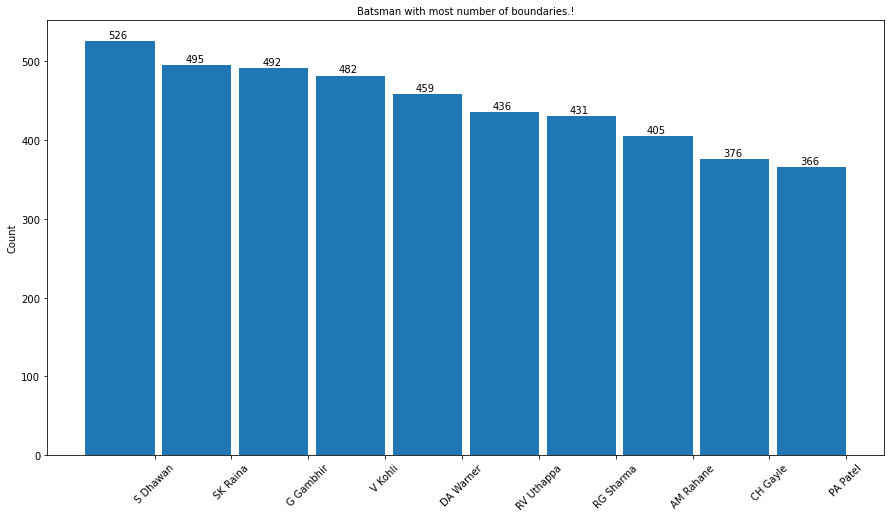

In [21]:
# Now let us see the players with more number of boundaries in IPL.
temp_df = df1.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+4),color='black')
plt.show()

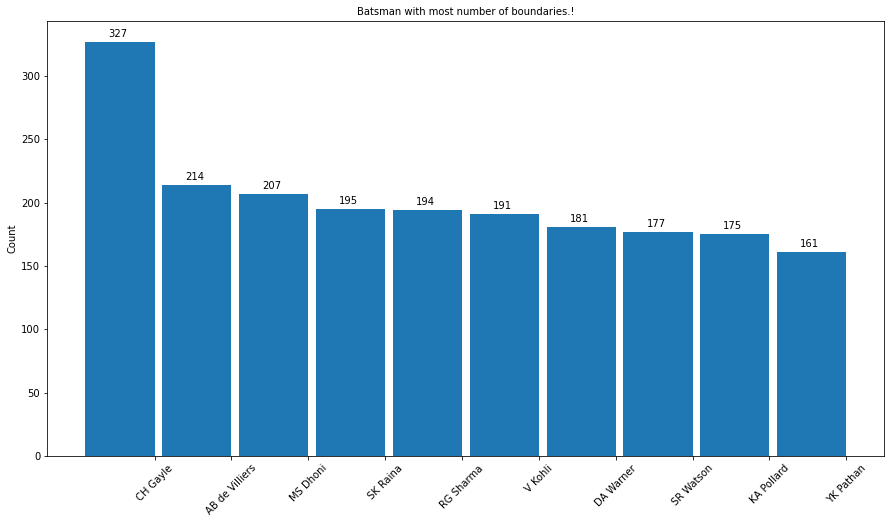

In [22]:
# Now let us see the players with more number of boundaries in IPL.
temp_df = df1.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+4),color='black')
plt.show()

# BOWLER ANALYSIS

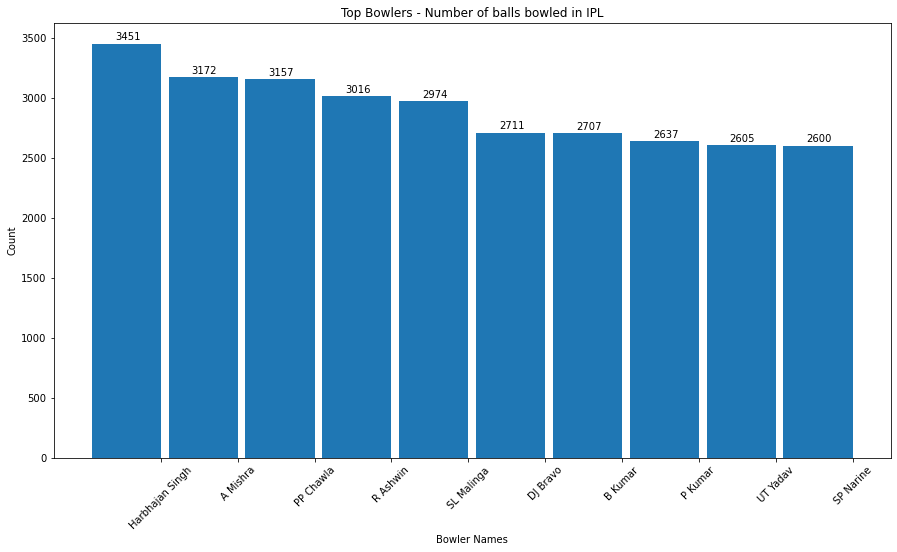

In [23]:
temp_df = df1.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+30),color='black')
plt.show()

Bajji Harbhajan Singh with golden arm bowled more number of balls in IPL so far.

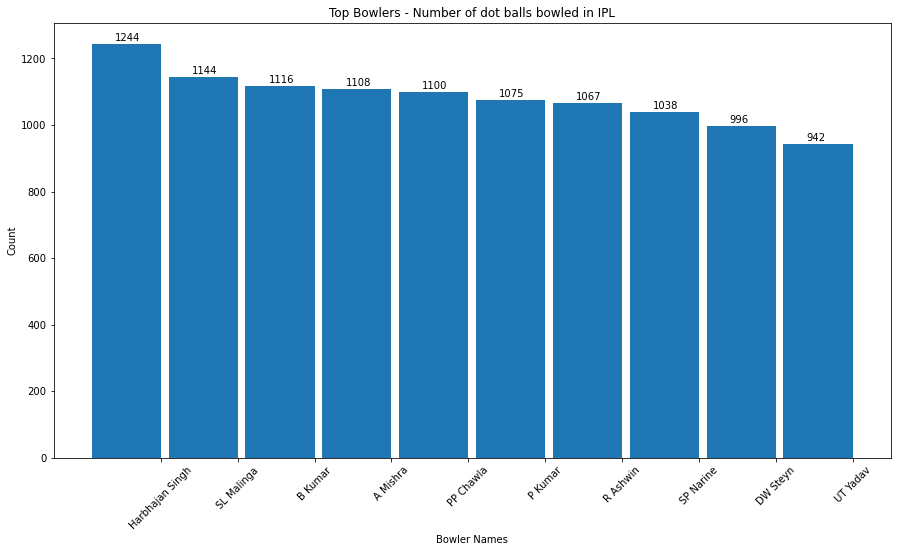

In [24]:
temp_df = df1.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+10),color='black')
plt.show()

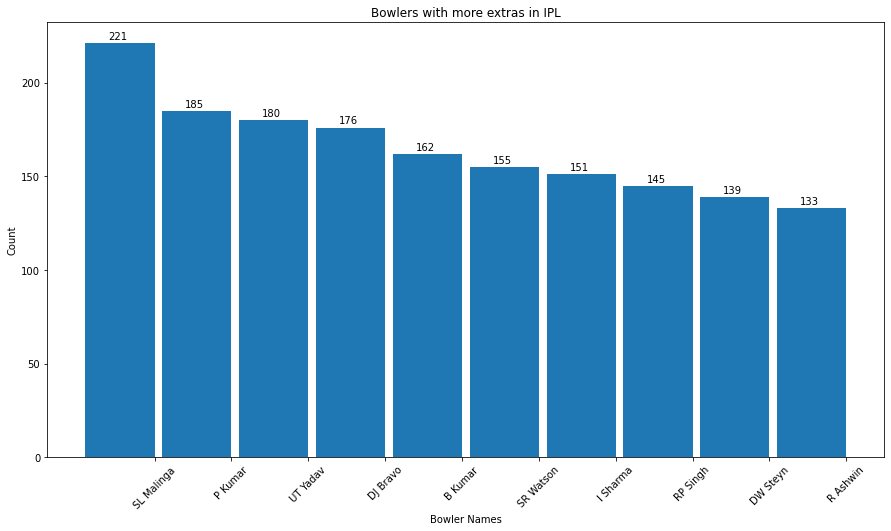

In [25]:
# Now let us see the bowlers who has bowled more number of extras in IPL.
temp_df = df1.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+2),color='black')
plt.show()
